In [10]:
import numpy as np
import pandas as pd

In [11]:
Data_Parsing = pd.read_excel('data/Data_TSUM.xlsx')
Data_Company = pd.read_excel('data/Data_TSUM.xlsx', sheet_name=1)

In [23]:
Data_Parsing.shape

(75, 5)

In [24]:
Data_Company.shape

(75, 5)

In [18]:
def change(string) -> str:
    """This ia function for delete symbols in string

    Args:
        string (str): input data

    Returns:
        str: correct data
    """
    sym_list = ['_', '-', '~', '\\', '/']
    for sym in string:
        if sym in sym_list:
            string = string.replace(sym, '')
    return string

fox = 'bla//ck bla\\ck aaaaa1111_12'
lis = change(fox)
lis

'black black aaaaa111112'

In [21]:
Data_Parsing['producer_id'] = Data_Parsing['producer_id'].apply(change)
Data_Parsing['producer_color'] = Data_Parsing['producer_color'].apply(change)
Data_Parsing.head()

,brand,Category,producer_id,producer_color,price
0,Valentino,Shoes,aaaaa111111,black,167
1,Valentino,Shoes,aaaaa111112,black,188
2,Valentino,Shoes,aaaaa111113,black,184
3,Valentino,Shoes,aaaaa111114,black,196
4,Valentino,Shoes,aaaaa111115,black,250


In [22]:
merged = Data_Parsing.merge(
    Data_Company,
    how='left',
    left_on='producer_id',
    right_on='item_id'
)
merged.head(10)

,brand_x,Category_x,producer_id,producer_color,price,brand_y,Category_y,item_id,color_id,current price
0,Valentino,Shoes,aaaaa111111,black,167,Valentino,Shoes,aaaaa111111,black,247
1,Valentino,Shoes,aaaaa111112,black,188,Valentino,Shoes,aaaaa111112,black,161
2,Valentino,Shoes,aaaaa111113,black,184,Valentino,Shoes,aaaaa111113,black,234
3,Valentino,Shoes,aaaaa111114,black,196,Valentino,Shoes,aaaaa111114,black,167
4,Valentino,Shoes,aaaaa111115,black,250,Valentino,Shoes,aaaaa111115,black,153
5,Valentino,Shoes,aaaaa111116,black,191,Valentino,Shoes,aaaaa111116,black,265
6,Valentino,Shoes,aaaaa111117,black,218,Valentino,Shoes,aaaaa111117,black,169
7,Valentino,Shoes,aaaaa111118,white,162,Valentino,Shoes,aaaaa111118,white,265
8,Valentino,Shoes,aaaaa111119,white,236,Valentino,Shoes,aaaaa111119,white,250
9,Valentino,Shoes,aaaaa111120,white,178,Valentino,Shoes,aaaaa111120,white,255


In [27]:
merged = merged.drop(['brand_y', 'Category_y'], axis=1)
merged.tail(10)

,brand_x,Category_x,producer_id,producer_color,price,item_id,color_id,current price
65,Stone Island,Bags,sssss111126,red,255,sssss111126,red,159
66,Stone Island,Bags,sssss111127,red,188,sssss111127,red,275
67,Stone Island,Bags,sssss111128,red,171,sssss111128,red,184
68,Stone Island,Bags,sssss111129,red,243,sssss111129,red,223
69,Stone Island,Bags,sssss111130,red,271,sssss111130,red,229
70,Stone Island,Bags,sssss111131,red,164,sssss111131,red,165
71,Stone Island,Bags,sssss111132,red,158,sssss111132,red,196
72,Stone Island,Bags,sssss111133,red,194,sssss111133,red,236
73,Stone Island,Bags,sssss111134,red,256,sssss111134,red,222
74,Stone Island,Bags,sssss111135,red,205,sssss111135,red,275


In [28]:
merged = merged.drop(['producer_id', 'producer_color'], axis=1)
merged.tail(10)

,brand_x,Category_x,price,item_id,color_id,current price
65,Stone Island,Bags,255,sssss111126,red,159
66,Stone Island,Bags,188,sssss111127,red,275
67,Stone Island,Bags,171,sssss111128,red,184
68,Stone Island,Bags,243,sssss111129,red,223
69,Stone Island,Bags,271,sssss111130,red,229
70,Stone Island,Bags,164,sssss111131,red,165
71,Stone Island,Bags,158,sssss111132,red,196
72,Stone Island,Bags,194,sssss111133,red,236
73,Stone Island,Bags,256,sssss111134,red,222
74,Stone Island,Bags,205,sssss111135,red,275


In [30]:
merged['diff_price'] = merged['price'] / merged['current price']
merged.head(10)

,brand_x,Category_x,price,item_id,color_id,current price,diff_price
0,Valentino,Shoes,167,aaaaa111111,black,247,0.676113
1,Valentino,Shoes,188,aaaaa111112,black,161,1.167702
2,Valentino,Shoes,184,aaaaa111113,black,234,0.786325
3,Valentino,Shoes,196,aaaaa111114,black,167,1.173653
4,Valentino,Shoes,250,aaaaa111115,black,153,1.633987
5,Valentino,Shoes,191,aaaaa111116,black,265,0.720755
6,Valentino,Shoes,218,aaaaa111117,black,169,1.289941
7,Valentino,Shoes,162,aaaaa111118,white,265,0.611321
8,Valentino,Shoes,236,aaaaa111119,white,250,0.944000
9,Valentino,Shoes,178,aaaaa111120,white,255,0.698039


In [31]:
merged['diff_price'].describe()

count    75.000000
mean      1.026598
std       0.288101
min       0.580205
25%       0.811358
50%       0.962963
75%       1.179144
max       1.684211
Name: diff_price, dtype: float64

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

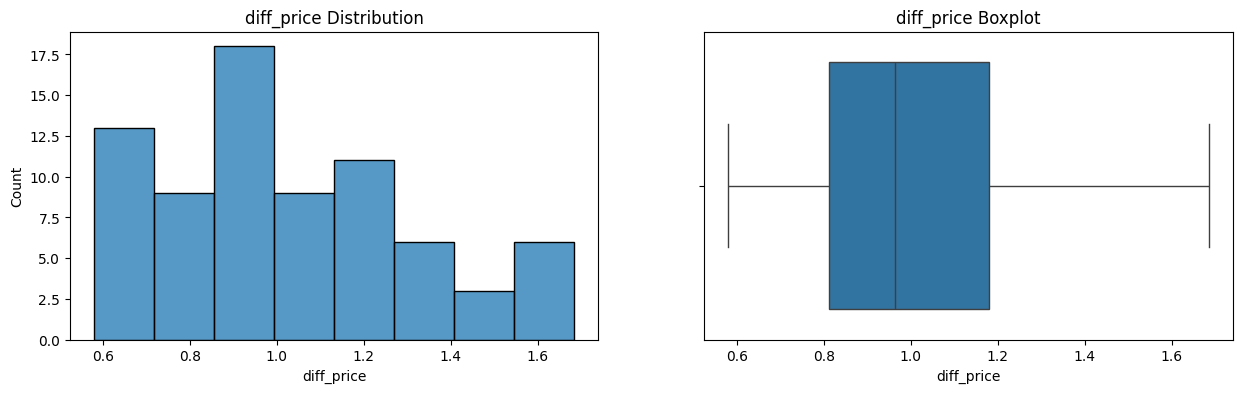

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=merged, x='diff_price', ax=axes[0]);
histplot.set_title('diff_price Distribution');
boxplot = sns.boxplot(data=merged, x='diff_price', ax=axes[1]);
boxplot.set_title('diff_price Boxplot');

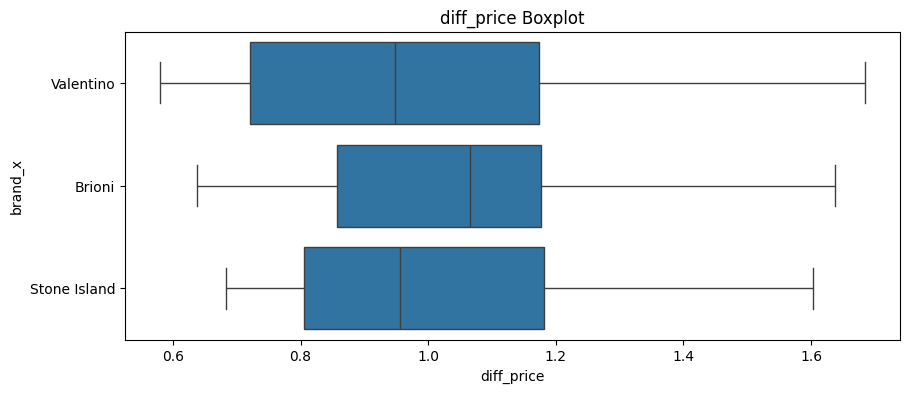

In [53]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
boxplot = sns.boxplot(data=merged, y='brand_x', x='diff_price', ax=axes);
boxplot.set_title('diff_price Boxplot');